In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime
import scipy.stats
import numpy as np

In [2]:
plt.style.use("bmh")

In [3]:
start=pd.to_datetime('2020-01-01', format='%Y-%m-%d')
today_date = datetime.today().strftime('%Y-%m-%d')

In [4]:
def get_historical_data(symbol, start_date):
# Fetch data from Yahoo Finance using yfinance 
    df = yf.download(symbol, start=start_date) 
    return df

In [5]:
# Example usage: Fetch historical data for NVIDIA (NVDA)
nvd = get_historical_data('NVDA', start) 

[*********************100%%**********************]  1 of 1 completed


In [6]:
nvd

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,5.968750,5.997750,5.918000,5.997750,5.973634,237536000
2020-01-03,5.877500,5.945750,5.852500,5.901750,5.878020,205384000
2020-01-06,5.808000,5.931750,5.781750,5.926500,5.902670,262636000
2020-01-07,5.955000,6.044250,5.909750,5.998250,5.974131,314856000
2020-01-08,5.994000,6.051000,5.953750,6.009500,5.985336,277108000
...,...,...,...,...,...,...
2024-08-30,119.529999,121.750000,117.220001,119.370003,119.370003,333751600
2024-09-03,116.010002,116.209999,107.290001,108.000000,108.000000,477155100
2024-09-04,105.410004,113.269997,104.120003,106.209999,106.209999,372470300


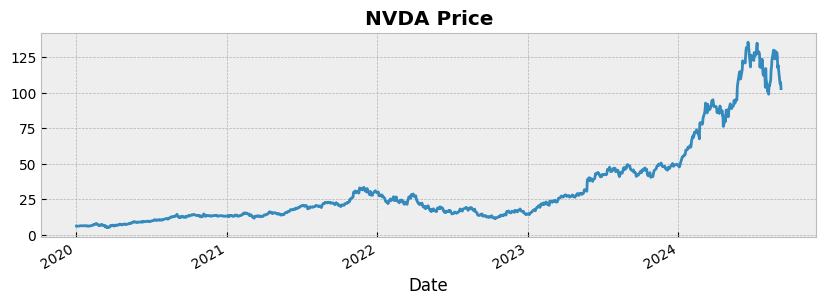

In [7]:
# Plotting the NVDA Adj Close price
fig = plt.figure() 
fig.set_size_inches(10, 3)

nvd["Adj Close"].plot()
plt.title("NVDA Price", weight="bold") 
plt.show()

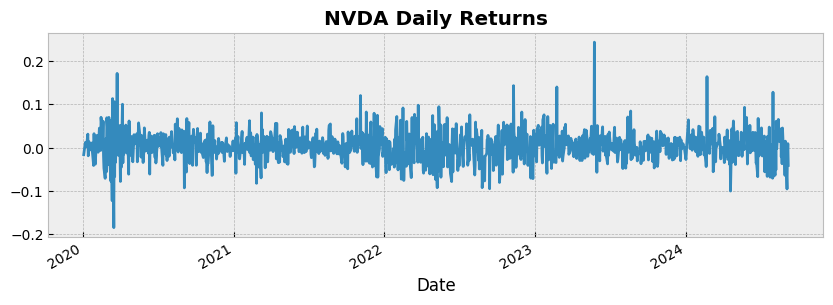

In [8]:
# Calculating the NVDA daily returns
fig = plt.figure() 
fig.set_size_inches(10, 3)

nvd["Daily Returns"] = nvd["Adj Close"].pct_change() 
nvd["Daily Returns"].plot()
plt.title("NVDA Daily Returns", weight="bold") 
plt.show()

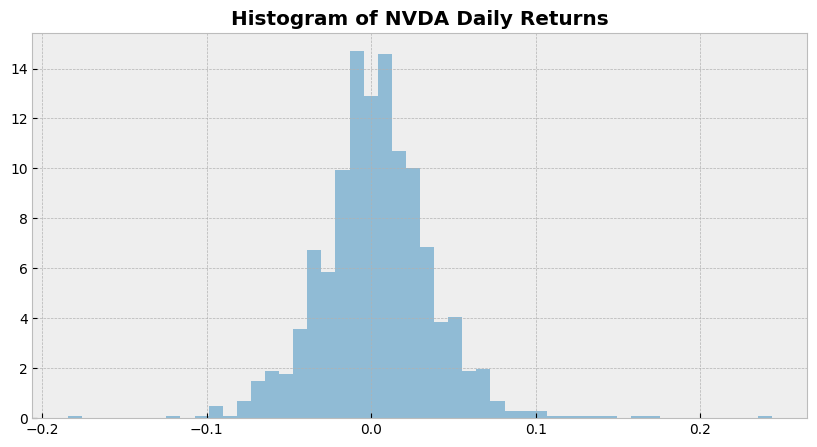

Standard Deviation of NVDA Daily Returns: 0.0344968885365284


In [9]:
# Plotting the histogram of NVDA daily returns and calculating standard deviation
fig = plt.figure() 
fig.set_size_inches(10, 5)

daily_returns = nvd["Adj Close"].pct_change()

# Plotting the histogram
daily_returns.hist(bins=50, density=True, histtype="stepfilled", alpha=0.5) 
plt.title("Histogram of NVDA Daily Returns", weight="bold")
plt.show()

# Calculating the standard deviation of daily returns
std_dev = daily_returns.std()
print(f"Standard Deviation of NVDA Daily Returns: {std_dev}")

In [10]:
# Calculating the normal probability Q-Q plot of NVDA daily returns
Q = nvd["Adj Close"].pct_change().dropna()

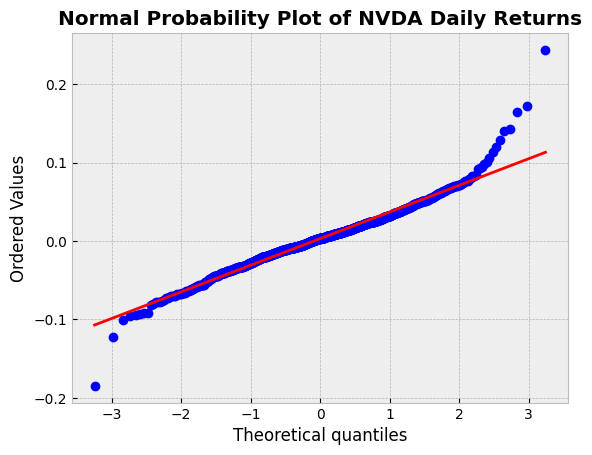

In [11]:
# Create the Q-Q plot
scipy.stats.probplot(Q, dist=scipy.stats.norm, plot=plt.figure().add_subplot(111)) 
plt.title("Normal Probability Plot of NVDA Daily Returns", weight="bold") 
plt.show()

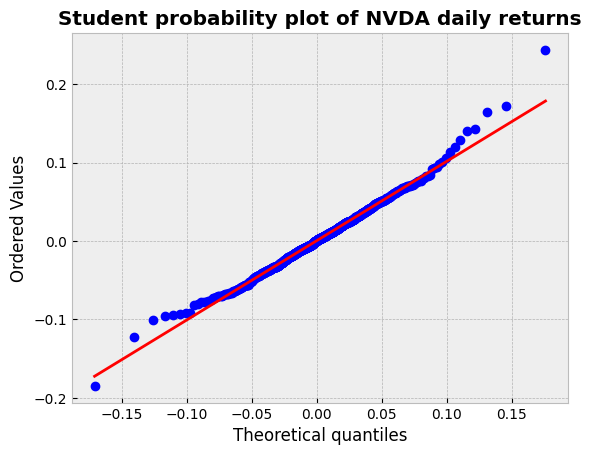

In [12]:
# Calculating the student probability Q-Q plot of NVDA daily returns
tdf, tmean, tsigma = scipy.stats.t.fit(Q)
scipy.stats.probplot(Q, dist=scipy.stats.t, sparams=(tdf, tmean, tsigma), plot=plt.figure().add_subplot(111)) 
plt.title("Student probability plot of NVDA daily returns", weight="bold");

In [13]:
# Calculating empirical quantiles from a histogram of NVDA daily returns
returns = nvd["Adj Close"].pct_change().dropna()

In [14]:
# Calculate mean and standard deviation
mean = returns.mean() 
sigma = returns.std()

In [15]:
# Fit a t-distribution to the data
tdf, tmean, tsigma = scipy.stats.t.fit(returns)

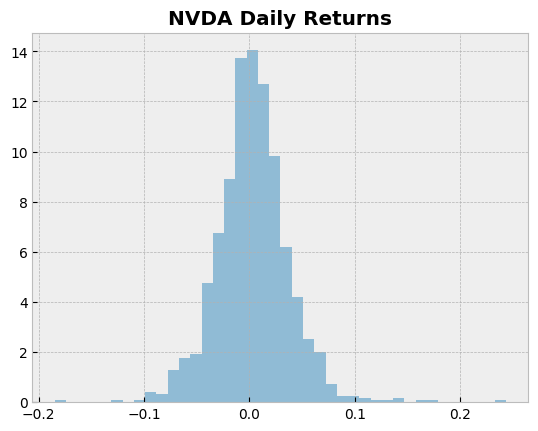

In [16]:
# Plotting the histogram
returns.hist(bins=40, density=True, histtype="stepfilled", alpha=0.5) 
plt.title("NVDA Daily Returns", weight="bold")
plt.show()

In [17]:
# Printing calculated statistics
print(f"Mean: {mean}")
print(f"Standard Deviation: {sigma}")
print(f"T-Distribution Fit Parameters: df={tdf}, mean={tmean}, sigma={tsigma}")

Mean: 0.003009903263275263
Standard Deviation: 0.03449688853652841
T-Distribution Fit Parameters: df=5.189292156452693, mean=0.002598735867091615, sigma=0.026969929897788444


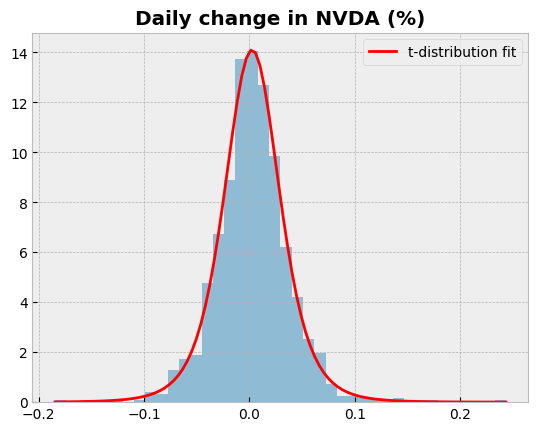

In [18]:
# Plotting the PDF approximation of the above empirical distribution
support = np.linspace(returns.min(), returns.max(), 100) # Corrected to use 'np.linspace' 
returns.hist(bins=40, density=True, histtype="stepfilled", alpha=0.5)

# Plotting the PDF of the t-distribution
plt.plot(support, scipy.stats.t.pdf(support, loc=tmean, scale=tsigma, df=tdf), "r-", label='t-distribution fit')
plt.title("Daily change in NVDA (%)", weight="bold")
plt.legend()
plt.show()

Running the following Monte Carlo simulation using the function random_walk. This function simulates one stock market evolution, and returns the price evolution as an array. It simulates geometric Brownian motion using pseudorandom numbers drawn from a normal distribution

In [19]:
days = 300 # time horizon
dt = 1/float(days)
sigma = 0.029052657589394 # volatility
mu = 0.0019397554019799652 # drift (average growth rate) 
startprice = 121.255

In [20]:
def random_walk(startprice): 
    price = np.zeros(days) 
    shock = np.zeros(days) 
    price[0] = startprice
    for i in range(1, days):
        shock[i] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt)) 
        price[i] = max(0, price[i-1] + shock[i] * price[i-1])
    return price

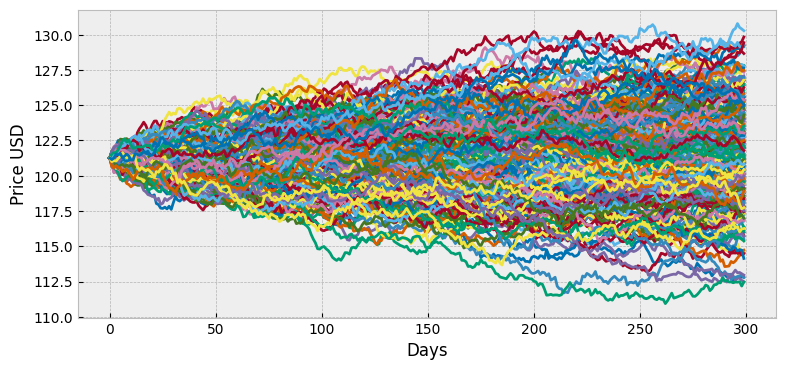

In [21]:
# Plotting the random walks
plt.figure(figsize=(9, 4)) 
for run in range(300):
    plt.plot(random_walk(startprice)) 
plt.xlabel("Days")
plt.ylabel("Price USD")
plt.show()

In [22]:
# Simulating final prices after 300 days
runs = 10000
simulations = np.zeros(runs) 
for run in range(runs):
    simulations[run] = random_walk(startprice)[days-1] 
    
q = np.percentile(simulations, 1)

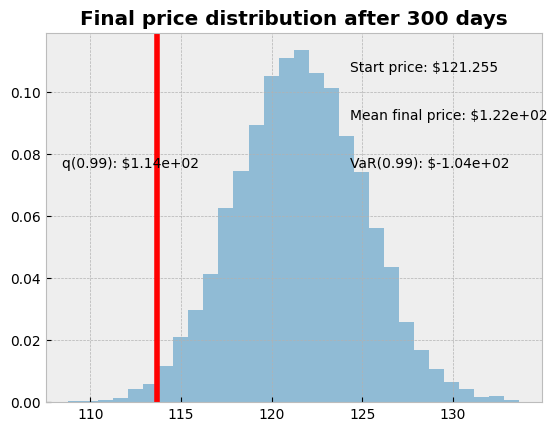

In [23]:
# Plotting the histogram of final prices
plt.hist(simulations, density=True, bins=30, histtype="stepfilled", alpha=0.5) 
plt.figtext(0.6, 0.8, "Start price: $121.255")
plt.figtext(0.6, 0.7, "Mean final price: ${:.3}".format(simulations.mean())) 
plt.figtext(0.6, 0.6, "VaR(0.99): ${:.3}".format(10 - q))
plt.figtext(0.15, 0.6, "q(0.99): ${:.3}".format(q))
plt.axvline(x=q, linewidth=4, color="r")
plt.title("Final price distribution after {} days".format(days), weight="bold") 
plt.show()